 _Nombre del Proyecto:_ **Análisis de "Chat Bots" de Inteligencia Artificial & Satisfacción del Usuario.**  

_Nombre completo:_ **José Gael Leyva Alvarado.**

_Nombre del profesor & Materia:_ **Jaime Alejandro Romero Sierra, Introducción a Ciencia de Datos.** 

_Fecha de entrega:_ **20-11-2025**  


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageTk 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df=pd.read_csv("df_limpioV4.csv")
df

ID_Sesion NivelEstudiante                  Disciplina FechaSesion  \
0     SESSION00001   Universitario  Ciencias de la Computación  2024-11-03   
1     SESSION00002   Universitario                 Matemáticas  2024-08-25   
2     SESSION00000   Universitario                    Negocios  2025-01-12   
3     SESSION00004   Universitario  Ciencias de la Computación  2025-05-06   
4     SESSION00005   Universitario                  Psicología  2025-03-18   
...            ...             ...                         ...         ...   
8617  SESSION09607        Graduado                 Matemáticas  2025-05-09   
8618  SESSION07940   Universitario                  Psicología  2025-02-09   
8619  SESSION00102   Universitario                  Ingeniería  2025-01-18   
8620  SESSION08149        Graduado                  Ingeniería  2024-12-22   
8621  SESSION02496   Universitario                 Matemáticas  2025-05-14   

      DuracionMinutos  TotalIndicaciones        TipoTarea  NivelAsistenciaIA  \
0               31.20                 11          Estudio                  2   
1               13.09                  6          Estudio                  3   
2               19.22                  5     Programación                  3   
3                3.70                  1     Programación                  3   
4               28.12                  9        Redacción                  3   
...               ...                ...              ...                ...   
8617            11.62                  3        Redacción                  5   
8618            56.13                 24    Investigación                  2   
8619            16.16                  4          Estudio                  4   
8620            20.55                  5        Redacción                  4   
8621             5.85                  1  Lluvia de Ideas                  5   

        ResultadoFinal  UsadoNuevamente  CalificacionSatisfaccion  
0     Tarea Completada             True                       1.0  
1     Tarea Completada             True                       2.0  
2     Tarea Completada             True                       3.3  
3     Tarea Completada             True                       3.5  
4     Tarea Completada             True                       2.9  
...                ...              ...                       ...  
8617     Idea Rezagada             True                       3.3  
8618        Confundido            False                       1.8  
8619  Tarea Completada             True                       1.9  
8620  Tarea Completada             True                       5.0  
8621     Idea Rezagada             True                       5.0  

[8622 rows x 11 columns]

In [339]:
print(df['UsadoNuevamente'].value_counts(dropna=False))

UsadoNuevamente
True     6064
False    2558
Name: count, dtype: int64


# **Introducción:**

Este proyecto tiene el objetivo de encontrar patrones y respuestas para poder tomar decisiones informadas en cuanto al uso de "_chat bots_" para uso personal y para negocios, de una manera de poder saber cuales son sus fortalezas, debilidades y en que campos se aplican que mejor para poder sacar el maximo provecho de estos sin gastar tiempo ni dinero.  

Es importante para poder evitar perdidas ya sea de tiempo en proyetos personales y de dinero en proyectos a mas grande escala, y sobre todo, sacar el maximo provecho de los "_chat bots_", para asi usarlos donde realmente valen la pena, y evitar el uso excesivo y rebundante de estos, que es un problema presente hoy en dia.

Se consiguio una base de datos de 10000 filas y 11 columnas de kaggle, que fue creada por Ayesha Saleem, estudiante de Ciencias de la Computación, y de esta misma base de datos se desarrola mi proyecto de analisis de datos y Machine Learning.

# **Metodología:**

## **Proceso de limpieza de datos:**

Empezamos con 11 columnas, 6 categoricas, 4 numericas y 1 una booleana. Aproximadamente, 15% de todos los datos eran NaN y datos duplicados, junto a aproximadamente, 200 datos de "bbb", se eliminaron aquellos que eran "bbb" y duplicados, mientras que se mantuvieron los NaN, pero al ser mediados por la media se lograron convertir en algo que no sea NaN. No hubo datos ausentes, y por lo general, no hubo problemas que notar, mas que una confusion en las traducciones que causo errores, que luego se corrigio de manera satisfactoria, solo con un despite en cuanto a una columna sin traducir. Otro error fue que en la columna de variables, se conviertieron los True y False en "True" y "False", lo que causo varias confusiones y errores, y sobretodo, generacion de NaN, pero se corrigio el error al mantenerlos como True y False.  

La metodologia fue:  

* Analisis de la base de datos.  
Mas que nada fue el ver que problemas se tenian y ver que no estaba como en la tabla original.  

* Traducción.  
Se paso del ingles al español, cada una de las columnas junto a los datos que continen.  

* Eliminación de NaN.  
Pero como se menciono, mas que eliminar, es reeplazarlos por otros datos que rellenen los espacios vacios usando los otros datos como media en caso de los numericos o referencia en los categoricos.  

* Eliminación de Duplicados.  
Se eliminaron los duplicados con un comando que apunta a mi columna principal.  

* Eliminación de Ouliers.  
Se detectaron primero aquellas columnas que contenian aquellos datos que son erroneos, en este caso, se indentifico que nuestro outlier era "bbb", y se encontraba en 4 columnas, por lo que se procedio a eliminarlo.  

* Reajuste del tipo de variables (objeto a int, etc)  
Aproximadamente, 4 columnas no tenian su tipo de variable correcto, por lo que se les cambio de vuelta a su valor de variable original.  

Mas información y el proceso completo en el resto de documentos del github que contiene este documento/codigo.



## **Análisis Exploratorio de Datos:**

### **Descripción de los datos.**

Necesitamos entender con que estamos trabajando, para saber que podemos hacer y con que datos:
* Empezamos con la cantidad.

In [340]:
df=df
df.shape

(8622, 11)

Tenemos 8636 filas y 11 columnas diferentes iniciales.

* Tipos de variables,

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8622 entries, 0 to 8621
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_Sesion                 8622 non-null   object 
 1   NivelEstudiante           8622 non-null   object 
 2   Disciplina                8622 non-null   object 
 3   FechaSesion               8622 non-null   object 
 4   DuracionMinutos           8622 non-null   float64
 5   TotalIndicaciones         8622 non-null   int64  
 6   TipoTarea                 8622 non-null   object 
 7   NivelAsistenciaIA         8622 non-null   int64  
 8   ResultadoFinal            8622 non-null   object 
 9   UsadoNuevamente           8622 non-null   bool   
 10  CalificacionSatisfaccion  8622 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 682.1+ KB


In [342]:
df.dtypes

ID_Sesion                    object
NivelEstudiante              object
Disciplina                   object
FechaSesion                  object
DuracionMinutos             float64
TotalIndicaciones             int64
TipoTarea                    object
NivelAsistenciaIA             int64
ResultadoFinal               object
UsadoNuevamente                bool
CalificacionSatisfaccion    float64
dtype: object

Tenemos, en total, seis objetos/categoricas, dos flotantes, dos numericas y solo una booleana.

La columna ID_Sesion es de tipo objeto/categorica.  

La columna NivelEstudiante es de tipo objeto/categorica.  

La columna Disciplina es de tipo objeto/categorica.  

La columna FechaSesion es de tipo objeto/categorica.  

La columna DuracionMinutos es de tipo flotante/decimal.  

La columna TotalIndicaciones es de tipo numerica.  

La columna TipoTarea es de tipo objeto/categorica.  

La columna NivelAsistenciaIA es de tipo numerica.  

La columna ResultadoFinal es de tipo objeto/categorica.  

La columna UsadoNuevamente es de tipo booleano (True & False.)  

La columna CalificacionSatisfaccion es de tipo flotante/decimal.

#### **Numericas:**

In [343]:
df.describe()

DuracionMinutos  TotalIndicaciones  NivelAsistenciaIA  \
count      8622.000000        8622.000000        8622.000000   
mean         19.802388           5.572257           3.485502   
std          13.749189           4.580670           0.984728   
min           0.030000           1.000000           1.000000   
25%           9.630000           2.000000           3.000000   
50%          16.700000           4.000000           4.000000   
75%          26.640000           8.000000           4.000000   
max          99.570000          39.000000           5.000000   

       CalificacionSatisfaccion  
count               8622.000000  
mean                   3.412306  
std                    1.146042  
min                    1.000000  
25%                    2.600000  
50%                    3.500000  
75%                    4.400000  
max                    5.000000

En cuanto a las numericas, tenemos que:

La columna DuracionMinutos tiene un valor minimo de 3 segundos, un valor maximo de 1 hora con 40 minutos, un valor medio de 19 minutos y una desviacion estandar de 13 minutos.  

La columna TotalIndicaciones tiene un valor minimo de 1 mensaje, un valor maximo de 39 mensajes, un valor medio de 5 a 6 mensajes y una desviacion estandar de 4 a 5 mensajes.

La columna NivelAsistenciaIA tiene un valor minimo de 1.0 a un valor maximo de 5.0 de calificación, un valor medio de 3 de calificación y una desviacion estandar de 1.

La columna CalificacionSatisfaccion tiene un valor minimo de 1.0 a un valor maximo de 5.0 de satisfacción final, un valor medio de 3 y una desviacion estandar de 1 de satisfacción final.

En cuanto a las categoricas:

In [344]:
df['ID_Sesion'].value_counts()

ID_Sesion
SESSION00001    1
SESSION00002    1
SESSION00000    1
SESSION00004    1
SESSION00005    1
               ..
SESSION09607    1
SESSION07940    1
SESSION00102    1
SESSION08149    1
SESSION02496    1
Name: count, Length: 8622, dtype: int64

In [345]:
df['NivelEstudiante'].value_counts()


NivelEstudiante
Universitario    5121
Preparatoria     1767
Graduado         1734
Name: count, dtype: int64

In [346]:
df['Disciplina'].value_counts()

Disciplina
Biología                      1260
Ciencias de la Computación    1248
Ingeniería                    1247
Matemáticas                   1228
Historia                      1218
Negocios                      1214
Psicología                    1207
Name: count, dtype: int64

In [347]:
df['FechaSesion'].value_counts()


FechaSesion
2024-12-20    37
2025-06-17    36
2025-04-16    36
2025-04-03    36
2025-01-31    35
              ..
2025-01-14    13
2024-12-28    13
2025-03-03    13
2024-12-30    13
2024-09-24    12
Name: count, Length: 366, dtype: int64

In [348]:
df['DuracionMinutos'].value_counts()


DuracionMinutos
8.12     10
10.57    10
20.02    10
13.40    10
12.50     9
         ..
28.36     1
42.85     1
36.59     1
51.98     1
31.83     1
Name: count, Length: 3761, dtype: int64

In [349]:
df['TotalIndicaciones'].value_counts()

TotalIndicaciones
1     1383
2     1081
3     1066
4      976
5      725
6      695
7      505
8      426
9      375
10     270
11     235
12     178
13     140
14     112
15      98
16      84
17      58
18      42
19      34
20      29
21      23
22      22
23      15
24      12
25       8
28       7
26       7
31       4
29       3
38       3
27       2
33       1
34       1
39       1
30       1
Name: count, dtype: int64

In [350]:
df['TipoTarea'].value_counts()

TipoTarea
Redacción           2717
Estudio             1761
Programación        1666
Ayuda con Tareas    1665
Lluvia de Ideas      414
Investigación        399
Name: count, dtype: int64

In [351]:
df['NivelAsistenciaIA'].value_counts()

NivelAsistenciaIA
4    2988
3    2925
5    1368
2    1144
1     197
Name: count, dtype: int64

In [352]:
df['ResultadoFinal'].value_counts()


ResultadoFinal
Tarea Completada    4151
Idea Rezagada       2424
Confundido          1381
Se rindió            666
Name: count, dtype: int64

In [353]:
df['UsadoNuevamente'].value_counts()

UsadoNuevamente
True     6064
False    2558
Name: count, dtype: int64

#### **Categoricas:**

**ID de la sesión no es posible de contar apropiadamente, pues todos son datos individuales:**  

**Niveles de los Estudiantes:**  

* Universitarios son 5135.  

* Preparatoria son 1751.  

* Graduados son 1750.  

**Disciplina:**  

* Biología son 1261.  

* Ingeniería son 1253.  

* Ciencias de la Computación son 1238.  

* Negocios son 1227.  

* Psicología son 1224.  

* Matemáticas son 1221.  

* Historia son 1212.  

**TipoTarea:**  

* Redacción son 2697.

* Estudio son 1751.

* Programación son 1700.

* Ayuda con Tareas son 1678.

* Lluvia de Ideas son 415.

* Investigación son 395.  

**ResultadoFinal:**  

* Tarea Completada son 4152.

* Idea Rezagada son 2433.

* Confundido son 1391.

* Gave Up son 660.

**Resultado Final:**  

* Tarea Completada son 4151.

* Idea Rezagada son 2424.

* Confundido son 1381.

* Se rindió son 666.

**Usado Nuevamente:**  

* True son 6068.

* False son 2572.

In [354]:
print(df['UsadoNuevamente'].value_counts(dropna=False))

UsadoNuevamente
True     6064
False    2558
Name: count, dtype: int64


### **Visualización y Distribución de valores individuales:**

In [355]:
df.columns

Index(['ID_Sesion', 'NivelEstudiante', 'Disciplina', 'FechaSesion',
       'DuracionMinutos', 'TotalIndicaciones', 'TipoTarea',
       'NivelAsistenciaIA', 'ResultadoFinal', 'UsadoNuevamente',
       'CalificacionSatisfaccion'],
      dtype='object')

In [356]:
categoricas = ['ID_Sesion','NivelEstudiante', 'Disciplina', 'TipoTarea', 'ResultadoFinal', 'UsadoNuevamente']
numericas = ['DuracionMinutos', 'TotalIndicaciones', 'NivelAsistenciaIA', "CalificacionSatisfaccion"]

#### **Numericas:**

##### **Histogramas:**

In [357]:
for col in numericas:
    fig = px.histogram(df, x=col, title='Histograma de numericas', color=col)
    fig.show()

Acerca de los histogramas:

**Duración en minutos:**  

Se puede notar que es muy alarmante a primera vista, y lo es, pero, tambien nos muestra un sesgo a la derecha, lo que apunta a menos tiempo invertido en cada sesión.

**Total de indicaciones/mensajes:**  

Hay un fuerte y visible sesgo a la derecha, apuntando hacia menos mensajes y menos extensión de conversación con la IA.

**Nivel de Asistencia de la IA:**  

Se nota un ligero sesgo hacia la izquierda, apuntando a calificaciones relativamente altas.

**Nivel de Satisfacción:**  

Seria simetrica con un ligero sesgo a la derecha, si no tomamos en cuenta a el 1 y 5, los extremos siendo particularmente mas altos que todos los valores intermedios, aunque hay una mayor preferencia a calificaciones altas, por lo que es un sesgo a la izquierda.

##### **Boxplots:**

In [358]:
for col in numericas:
    fig = px.box(df, y=col, title='Detección de datos atípicos')
    fig.update_layout(width=300,height=500) 
    fig.show()

Acerca de los boxplots:

**Duración en minutos:**  

Con una media de 16.7, de un universo de 0.03 a 99.57, es el que presenta mas outliers, pues los tiempos en que la gente usa la IA son muy diferentes, aunque se puede notar que las conversaciones suelen ser de 10 a 27 minutos.

**Total de indicaciones/mensajes:**  

Con una media de 4 en un rango de 2 a 8 mensajes, de un universo de 1 a 39 tenemos varios outliers, pero, basados solamente en el promedio y rangos, podemos ver que lo mas comun son conversaciones breves.

**Nivel de Asistencia de la IA:**  

Con una media de 4 en un rango de 3 a 4, de un universo de 1 a 5, solamente hay un outlier, curiosamente, este oulier es el nivel de asistencia mas bajo de 1, lo que parece indicar que una calificación negativa es rara, y suele haber mayormente calificaciones medias ya altas.

**Nivel de Satisfacción:**  

Con una media de de 3.5, en un rango de 2.6 a 4.4, de un universo de 1 a 5, la satisfacción de los usuarios parece ser media, con una tendencia a ligeramente baja.

##### **Violin:**

Estos graficos nos dan resultados similares a los boxplots, pero ayudan a aclarar la idea de los mismos, mismos rangos y descripciones, mas visualización de estos.

In [359]:
for col in numericas:
    fig = px.violin(df, y=col, title=f'Diagrama de Violín - {col}')
    fig.show()

#### **Categoricas:**

##### **Graficos de Barra:**

Ahora de los categoricos, se creara graficos de barra.

In [360]:
print(categoricas)

['ID_Sesion', 'NivelEstudiante', 'Disciplina', 'TipoTarea', 'ResultadoFinal', 'UsadoNuevamente']


In [361]:
counts = df['NivelEstudiante'].value_counts().reset_index()
counts.columns = ['NivelEstudiante', 'Frecuencia']

fig = px.bar(counts, x='NivelEstudiante', y='Frecuencia', title='Frecuencia de Niveles de Estudiante', 
              color='NivelEstudiante')

fig.show()

Un sesgo hacia la derecha, existen muchos mas estudiantes universitarios que graduados o de preparatoria.

In [362]:
counts = df['Disciplina'].value_counts().reset_index()
counts.columns = ['Disciplina', 'Frecuencia']

fig = px.bar(counts, x='Disciplina', y='Frecuencia', title='Frecuencia de Disciplinas', 
              color='Disciplina')

fig.show()

Es uniforme, con un muy pequeño sesgo a la derecha, lo que nos muestra que biologia es mas comun que psicologia.

In [363]:
counts = df['TipoTarea'].value_counts().reset_index()
counts.columns = ['TipoTarea', 'Frecuencia']

fig = px.bar(counts, x='TipoTarea', y='Frecuencia', title='Frecuencia de Tipos de Tarea', 
              color='TipoTarea')

fig.show()

Un claro sesgo hacia la derecha, el tema mas usado siendo la redacción, y la investigación el menos usado.

In [364]:
counts = df['ResultadoFinal'].value_counts().reset_index()
counts.columns = ['ResultadoFinal', 'Frecuencia']

fig = px.bar(counts, x='ResultadoFinal', y='Frecuencia', title='Frecuencia de Resultados Finales', 
              color='ResultadoFinal')

fig.show()

Otro sesgo hacia la derecha, demostrando que la myoria de las veces, la tarea se logra con cierto indice de exito.

In [365]:
counts = df['UsadoNuevamente'].value_counts().reset_index()
counts.columns = ['UsadoNuevamente', 'Frecuencia']

fig = px.bar(counts, x='UsadoNuevamente', y='Frecuencia', title='Frecuencia de Uso Nuevamente', 
              color='UsadoNuevamente')

fig.show()

Finalmente, un sesgo a la derecha, que muestra que mucha gente vuelve a usar la Inteligencia Artificial.

In [383]:
print(df['UsadoNuevamente'].value_counts(dropna=False))

UsadoNuevamente
True     6064
False    2558
Name: count, dtype: int64


### **Correlación entre matrices:**

#### **Matriz de correlación:**

##### **Heatmaps:**

In [11]:
df2=df.copy()

In [369]:
df_numeric = df[['DuracionMinutos', 'TotalIndicaciones', 'NivelAsistenciaIA', 'CalificacionSatisfaccion']]

correlation_matrix = df_numeric.corr()
correlation_matrix

DuracionMinutos  TotalIndicaciones  \
DuracionMinutos                  1.000000           0.804244   
TotalIndicaciones                0.804244           1.000000   
NivelAsistenciaIA               -0.018498          -0.014336   
CalificacionSatisfaccion        -0.007369           0.001049   

                          NivelAsistenciaIA  CalificacionSatisfaccion  
DuracionMinutos                   -0.018498                 -0.007369  
TotalIndicaciones                 -0.014336                  0.001049  
NivelAsistenciaIA                  1.000000                  0.695477  
CalificacionSatisfaccion           0.695477                  1.000000

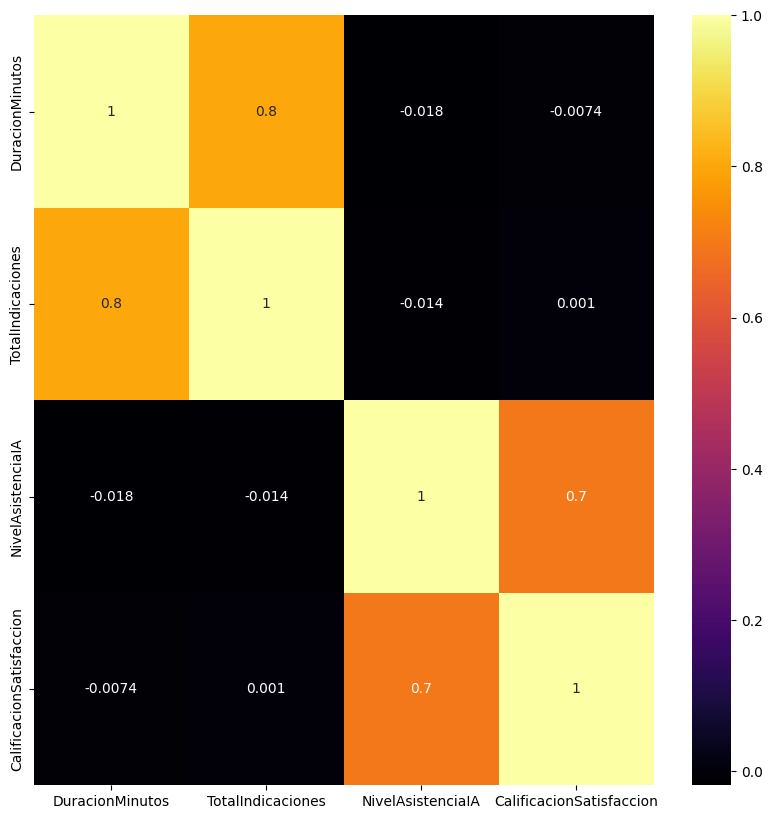

In [370]:
plt.figure(figsize=(10,10))

sns.heatmap(correlation_matrix, annot=True, cmap='inferno')

plt.show()

In [371]:
df2['NivelEstudiante'] = df2['NivelEstudiante'].map({'Universitario': 1, 'Preparatoria': 2,"Graduado": 3})
df2['Disciplina'] = df2['Disciplina'].map({'Ciencias de la Computación': 1, 'Matemáticas': 2,'Negocios':3, 'Psicología': 4, 'Biología': 5,'Historia':6, 'Ingeniería': 7})
df2['TipoTarea'] = df2['TipoTarea'].map({'Estudio': 1, 'Programación': 2,'Redacción':3,'Lluvia de Ideas':4, 'Ayuda con Tareas': 5,'Investigación':6})
df2['UsadoNuevamente'] = df2['UsadoNuevamente'].map({True: 1, False: 2})
df2['ResultadoFinal'] = df2['ResultadoFinal'].map({'Tarea Completada': 1, 'Idea Rezagada': 2,'Confundido':3, 'Se rindió': 4})
df2

ID_Sesion  NivelEstudiante  Disciplina FechaSesion  DuracionMinutos  \
0     SESSION00001                1           1  2024-11-03            31.20   
1     SESSION00002                1           2  2024-08-25            13.09   
2     SESSION00000                1           3  2025-01-12            19.22   
3     SESSION00004                1           1  2025-05-06             3.70   
4     SESSION00005                1           4  2025-03-18            28.12   
...            ...              ...         ...         ...              ...   
8617  SESSION09607                3           2  2025-05-09            11.62   
8618  SESSION07940                1           4  2025-02-09            56.13   
8619  SESSION00102                1           7  2025-01-18            16.16   
8620  SESSION08149                3           7  2024-12-22            20.55   
8621  SESSION02496                1           2  2025-05-14             5.85   

      TotalIndicaciones  TipoTarea  NivelAsistenciaIA  ResultadoFinal  \
0                    11          1                  2               1   
1                     6          1                  3               1   
2                     5          2                  3               1   
3                     1          2                  3               1   
4                     9          3                  3               1   
...                 ...        ...                ...             ...   
8617                  3          3                  5               2   
8618                 24          6                  2               3   
8619                  4          1                  4               1   
8620                  5          3                  4               1   
8621                  1          4                  5               2   

      UsadoNuevamente  CalificacionSatisfaccion  
0                   1                       1.0  
1                   1                       2.0  
2                   1                       3.3  
3                   1                       3.5  
4                   1                       2.9  
...               ...                       ...  
8617                1                       3.3  
8618                2                       1.8  
8619                1                       1.9  
8620                1                       5.0  
8621                1                       5.0  

[8622 rows x 11 columns]

In [372]:
df2_numeric = df2[['NivelEstudiante', 'Disciplina', 'TipoTarea', 'ResultadoFinal', 'UsadoNuevamente']]

correlation_matrix2 = df2_numeric.corr()
correlation_matrix2

NivelEstudiante  Disciplina  TipoTarea  ResultadoFinal  \
NivelEstudiante         1.000000   -0.007074   0.013338        0.010273   
Disciplina             -0.007074    1.000000   0.001182        0.002517   
TipoTarea               0.013338    0.001182   1.000000        0.026085   
ResultadoFinal          0.010273    0.002517   0.026085        1.000000   
UsadoNuevamente        -0.003532   -0.012505   0.020376        0.295407   

                 UsadoNuevamente  
NivelEstudiante        -0.003532  
Disciplina             -0.012505  
TipoTarea               0.020376  
ResultadoFinal          0.295407  
UsadoNuevamente         1.000000

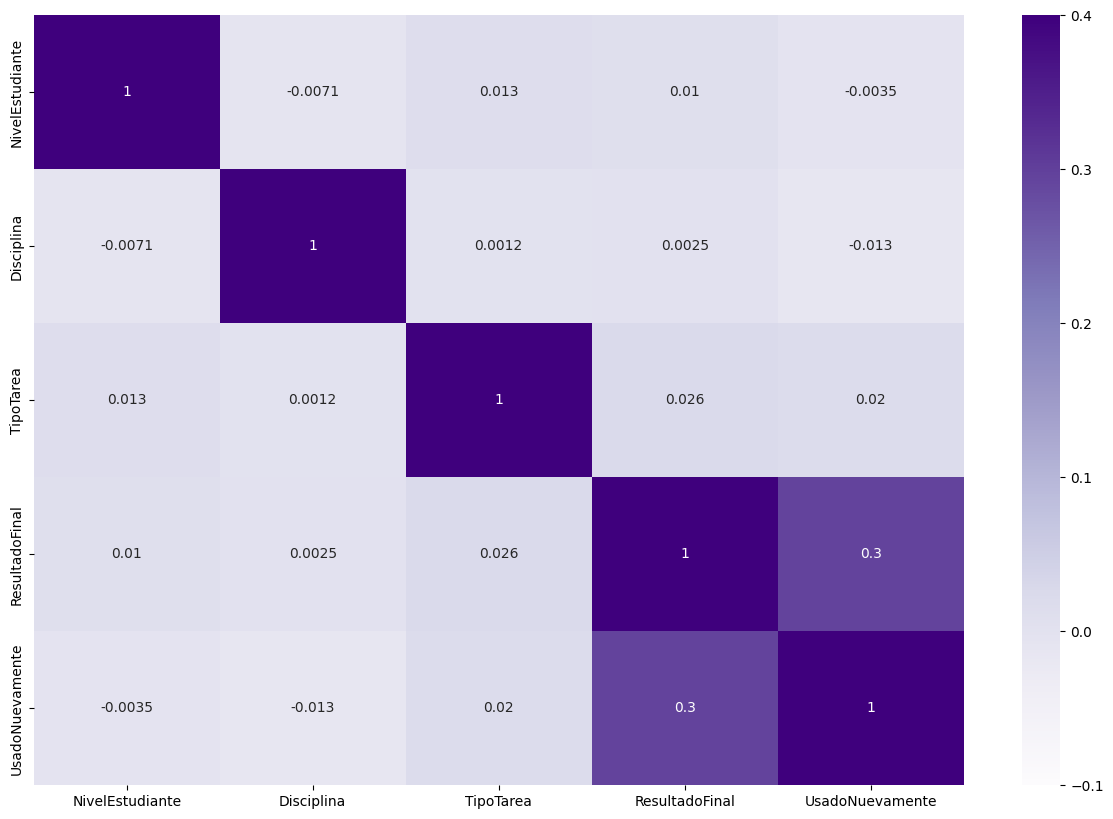

In [373]:
plt.figure(figsize=(15,10))

sns.heatmap(correlation_matrix2, annot=True, cmap='Purples', vmin=-0.1, vmax=0.4)

# Mostrar gráfico
plt.show()

In [374]:
df3_numeric = df2[['NivelEstudiante', 'Disciplina', 'TipoTarea', 'ResultadoFinal', 'UsadoNuevamente', 'DuracionMinutos', 'TotalIndicaciones', 'NivelAsistenciaIA', 'CalificacionSatisfaccion']]

correlation_matrix3 = df3_numeric.corr()
correlation_matrix3

NivelEstudiante  Disciplina  TipoTarea  \
NivelEstudiante                  1.000000   -0.007074   0.013338   
Disciplina                      -0.007074    1.000000   0.001182   
TipoTarea                        0.013338    0.001182   1.000000   
ResultadoFinal                   0.010273    0.002517   0.026085   
UsadoNuevamente                 -0.003532   -0.012505   0.020376   
DuracionMinutos                  0.009118    0.008561   0.015127   
TotalIndicaciones                0.013736    0.006358   0.012373   
NivelAsistenciaIA               -0.004503    0.006917  -0.005979   
CalificacionSatisfaccion        -0.001912    0.015935  -0.013098   

                          ResultadoFinal  UsadoNuevamente  DuracionMinutos  \
NivelEstudiante                 0.010273        -0.003532         0.009118   
Disciplina                      0.002517        -0.012505         0.008561   
TipoTarea                       0.026085         0.020376         0.015127   
ResultadoFinal                  1.000000         0.295407         0.009299   
UsadoNuevamente                 0.295407         1.000000         0.000755   
DuracionMinutos                 0.009299         0.000755         1.000000   
TotalIndicaciones               0.008828        -0.007474         0.804244   
NivelAsistenciaIA              -0.004763         0.018072        -0.018498   
CalificacionSatisfaccion       -0.001518         0.017198        -0.007369   

                          TotalIndicaciones  NivelAsistenciaIA  \
NivelEstudiante                    0.013736          -0.004503   
Disciplina                         0.006358           0.006917   
TipoTarea                          0.012373          -0.005979   
ResultadoFinal                     0.008828          -0.004763   
UsadoNuevamente                   -0.007474           0.018072   
DuracionMinutos                    0.804244          -0.018498   
TotalIndicaciones                  1.000000          -0.014336   
NivelAsistenciaIA                 -0.014336           1.000000   
CalificacionSatisfaccion           0.001049           0.695477   

                          CalificacionSatisfaccion  
NivelEstudiante                          -0.001912  
Disciplina                                0.015935  
TipoTarea                                -0.013098  
ResultadoFinal                           -0.001518  
UsadoNuevamente                           0.017198  
DuracionMinutos                          -0.007369  
TotalIndicaciones                         0.001049  
NivelAsistenciaIA                         0.695477  
CalificacionSatisfaccion                  1.000000

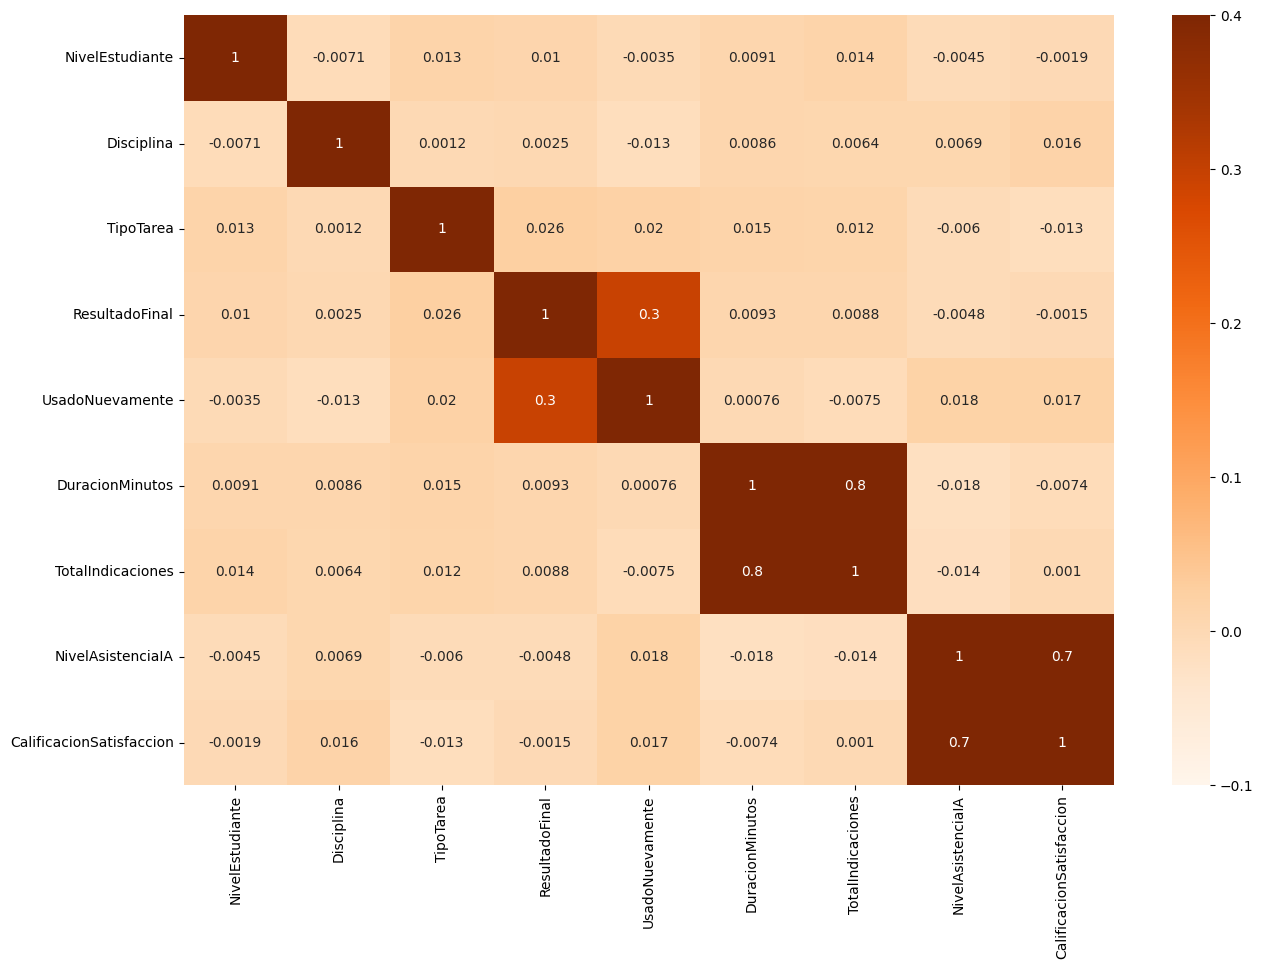

In [375]:
plt.figure(figsize=(15,10))

sns.heatmap(correlation_matrix3, annot=True, cmap='Oranges', vmin=-0.1, vmax=0.4)

plt.show()

Hay solamente dos correlaciones directas entre todos los datos, estas siendo Nivel de Calificación de la IA, con el Nivel de Asistencia con 0.7 de correlación, & Total de mensajes con la duración en minutos con 0.8 de correlación; en cuanto a los demas, la tercera mas alta seria el Resultado Final con el Tipo de Tarea. con solamente 0.026 de correlación.

#### **Parejas de variables::**

##### **Graficos de dispersión:**

In [376]:

fig = px.scatter(df, x='DuracionMinutos',y='TotalIndicaciones', title='Diagrama de Dispersión')
fig.show()

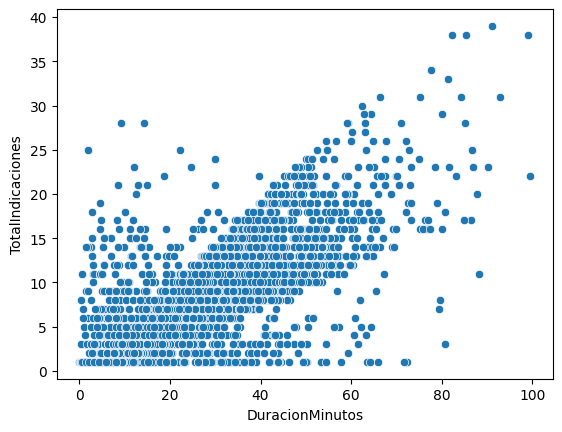

In [377]:
sns.scatterplot(x='DuracionMinutos',y='TotalIndicaciones',data=df)
plt.show()

In [378]:

fig = px.scatter(df, x='CalificacionSatisfaccion',y='NivelAsistenciaIA', title='Diagrama de Dispersión')
fig.show()

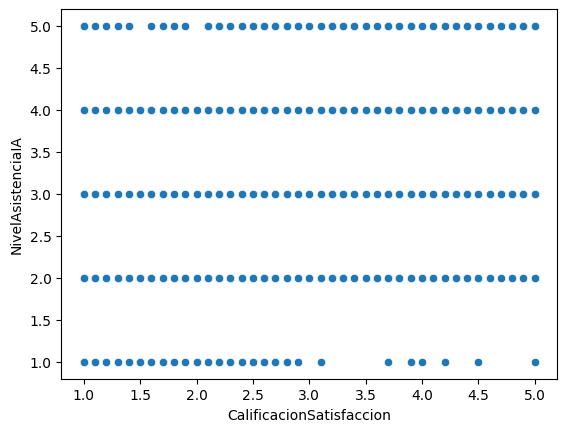

In [379]:
sns.scatterplot(x='CalificacionSatisfaccion',y='NivelAsistenciaIA',data=df)
plt.show()

In [380]:
fig = px.scatter(df, x='ResultadoFinal',y='TipoTarea', title='Diagrama de Dispersión')
fig.show()

In [381]:
print(df['UsadoNuevamente'].value_counts(dropna=False))

UsadoNuevamente
True     6064
False    2558
Name: count, dtype: int64


### **Analisis de Valores Atipicos/Outliers.**

#### **Identificación:**

In [384]:
for col in numericas:
    fig = px.box(df, y=col, title='Detección de datos atípicos')
    fig.update_layout(width=300,height=500) 
    fig.show()

In [385]:
Q1 =df["DuracionMinutos"].quantile(0.25)
Q3 =df["DuracionMinutos"].quantile(0.75)

IQR = Q3 - Q1

outliers = df[(df["DuracionMinutos"] < (Q1 - 1.5*IQR)) | (df["DuracionMinutos"] > (Q3 + 1.5*IQR))]

In [386]:
print(outliers)

         ID_Sesion NivelEstudiante                  Disciplina FechaSesion  \
48    SESSION00057    Preparatoria                  Ingeniería  2024-09-05   
169   SESSION00198   Universitario  Ciencias de la Computación  2025-03-06   
182   SESSION00214   Universitario  Ciencias de la Computación  2024-11-11   
195   SESSION00229        Graduado                    Negocios  2024-09-03   
227   SESSION00263   Universitario                    Biología  2025-01-01   
...            ...             ...                         ...         ...   
8417  SESSION09816   Universitario  Ciencias de la Computación  2024-10-10   
8438  SESSION09840    Preparatoria                    Negocios  2024-07-19   
8498  SESSION09915   Universitario                  Ingeniería  2025-03-12   
8520  SESSION09940        Graduado                  Psicología  2024-12-27   
8618  SESSION07940   Universitario                  Psicología  2025-02-09   

      DuracionMinutos  TotalIndicaciones         TipoTarea  Niv

#### **Tratamiento:**

In [387]:
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [388]:
df = df[(df["DuracionMinutos"] >= limite_inferior) & 
                     (df["DuracionMinutos"] <= limite_superior)]

In [389]:
df = df[(df["TotalIndicaciones"] >= limite_inferior) & 
                     (df["TotalIndicaciones"] <= limite_superior)]

In [390]:
for col in numericas:
    fig = px.box(df, y=col, title='Detección de datos atípicos')
    fig.update_layout(width=300,height=500) 
    fig.show()

Se alteraros 2 de las 4 graficas, la primera siendo la Duración en Minutos, en la que se elimino una amplia cantidad de los outliers, esto se debe a que estas son entradas individuales excepcionales de ciertos usuarios y que mientras que muestran cierta información alteran la media al ser varios muy grandes.

Acerca del Total de Indicaciones, se borraron algunos datos correlacionados con la anterior grafica, pues mientras mas tiempo, mas mensajes, si se borra de uno, se deberia borrar del otro para no dejar datos no correlacionados que puedan provocar problematicas a futuro.

### **Analsis de Valores Faltantes:**

#### **Identificación:**

In [394]:
(df.isna().sum()/len(df)*100)

ID_Sesion                   0.0
NivelEstudiante             0.0
Disciplina                  0.0
FechaSesion                 0.0
DuracionMinutos             0.0
TotalIndicaciones           0.0
TipoTarea                   0.0
NivelAsistenciaIA           0.0
ResultadoFinal              0.0
UsadoNuevamente             0.0
CalificacionSatisfaccion    0.0
dtype: float64

<Axes: >

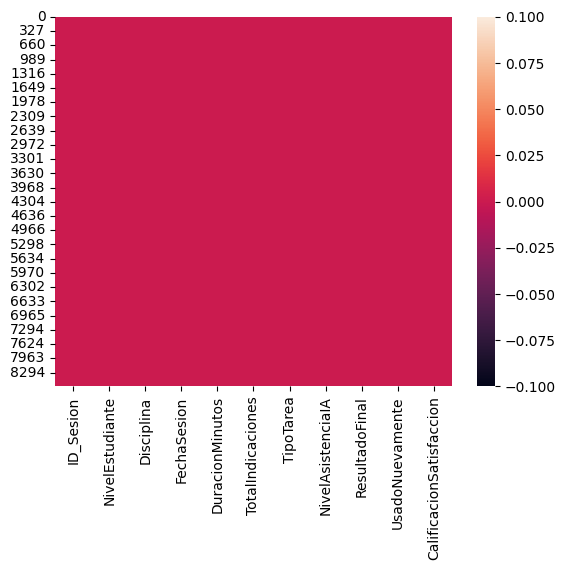

In [395]:
(sns.heatmap(df.isnull()))

In [393]:
print(df['UsadoNuevamente'].value_counts(dropna=False))

UsadoNuevamente
True     5893
False    2472
Name: count, dtype: int64


#### **Tratamiento:**

No hay, todo es 0, por ende, no hay mucho mas que hacer!

### **Relación entre variables categoricas y numericas:**

Se analizaran las relaciones que haya entre las variables categoricas y numericas para poder entender que tipo de correlaciones podemos encontrar.

<Axes: xlabel='NivelEstudiante', ylabel='DuracionMinutos'>

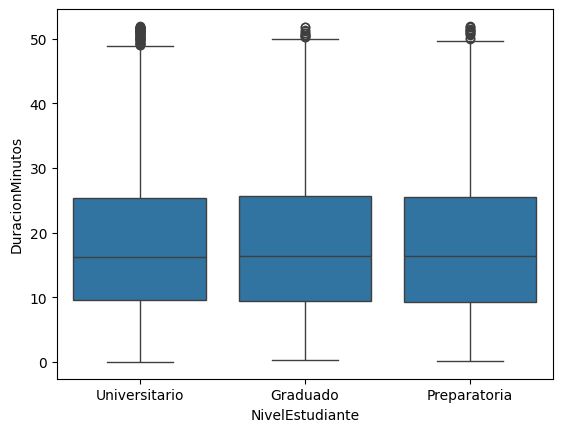

In [398]:
sns.boxplot(x="NivelEstudiante", y="DuracionMinutos", data=df)

La correlación es minima, pero podemos ver que las personas graduadas usan ligeramente mas la IA, mientras que los universitarios son los que menos la usan, aunque, otra vez, son diferencias minimas.

<Axes: xlabel='NivelEstudiante', ylabel='NivelAsistenciaIA'>

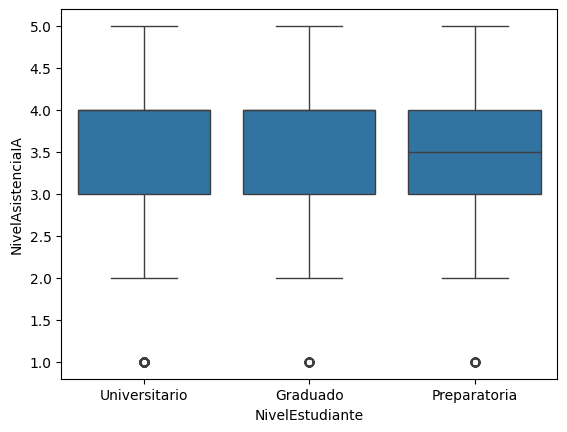

In [399]:
sns.boxplot(x="NivelEstudiante", y="NivelAsistenciaIA", data=df)

No hay correlación alguna, todos tienen los mimso rangos.

<Axes: xlabel='NivelEstudiante', ylabel='CalificacionSatisfaccion'>

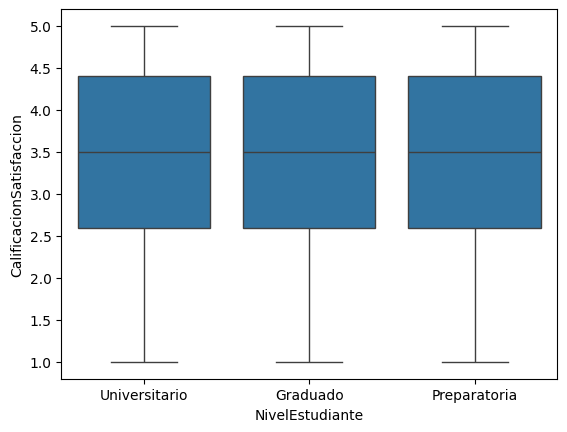

In [402]:
sns.boxplot(x="NivelEstudiante", y="CalificacionSatisfaccion", data=df)

Sin correlación.

<Axes: xlabel='NivelEstudiante', ylabel='TotalIndicaciones'>

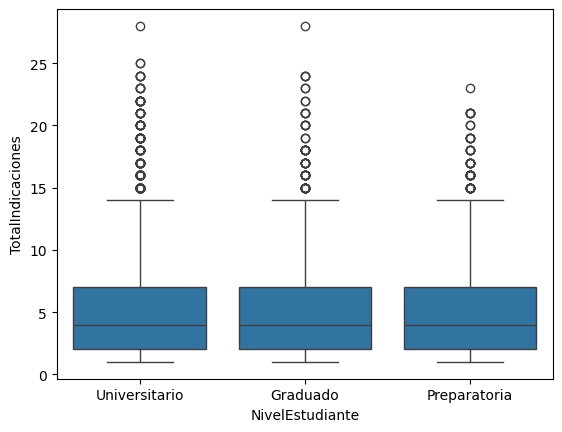

In [403]:
sns.boxplot(x="NivelEstudiante", y="TotalIndicaciones", data=df)

La correlación es notoria en cuanto a los outliers, se puede percibir una mayor cantidad de mensajes de parte de los universitarios, mientras que los estudiantes de preparatoria suelen tener menos mensajes.

<Axes: xlabel='Disciplina', ylabel='DuracionMinutos'>

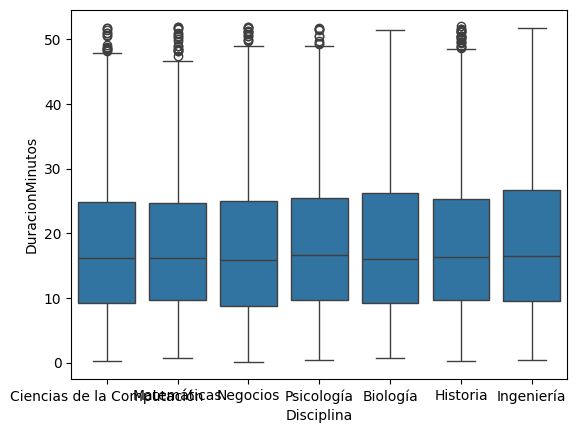

In [404]:
sns.boxplot(x="Disciplina", y="DuracionMinutos", data=df)

Las diferencias aqui son mucho mas notorias, podemos ver que Ingennieria junto a Biologia tienen las conversaciones mas extensas con la IA, pero al mismo tiempo, la menor cantidad de ouutliers, mientras que historia y Matematicas tienen la mayor cantidad de outliers, se podria intuir que los estudiantes de Ingeneria y Biologia tienen el uso mas estable, constante y al parecer controlado de la IA, mientras que las materias de Matematicas e Historia ven usos mas erraticos entre si, muchos siendo mas largos que la media. El resto de disciplinas exhibe una duración similar a Historia y Matematicas.

<Axes: xlabel='Disciplina', ylabel='TotalIndicaciones'>

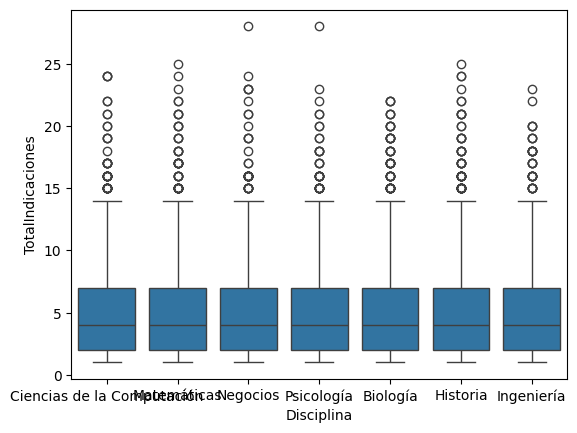

In [405]:
sns.boxplot(x="Disciplina", y="TotalIndicaciones", data=df)

Podemos notar que mientras todos poseen medidas muy similares, las materias de negocios y psicologia presentan outliers grandes, junto a Historia y Matemticas, esto podria indicar que los estudiantes de estas 4 disciplinas tienen conversaciones mas detalladas y extensas.

<Axes: xlabel='Disciplina', ylabel='NivelAsistenciaIA'>

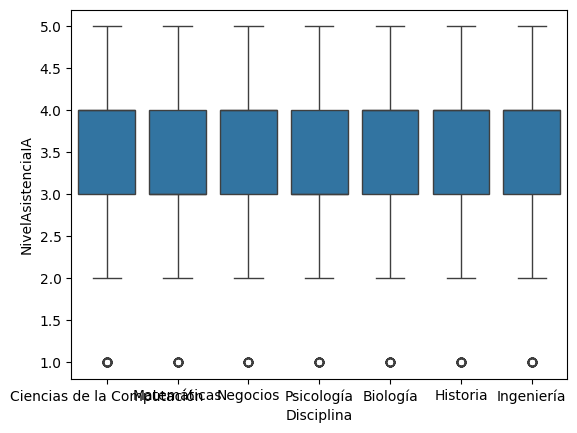

In [406]:
sns.boxplot(x="Disciplina", y="NivelAsistenciaIA", data=df)

No hay diferencia alguna.

<Axes: xlabel='Disciplina', ylabel='CalificacionSatisfaccion'>

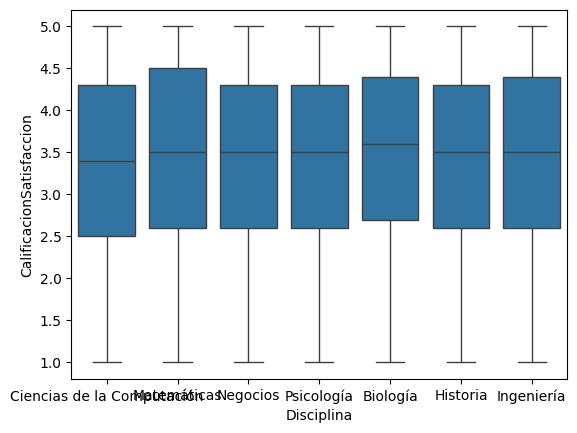

In [407]:
sns.boxplot(x="Disciplina", y="CalificacionSatisfaccion", data=df)

En este caso, las diferencias son grandes, en un inicio, podemos notar que las discplinas mas satisfechas con la IA son Matematicas y Biologia, mientras que Negocios, Psicologia e Historia se encuentran en un promedio normal, y Ciencias de la Computación es la mas insatisfecha. Esto podria decir que la IA tiene mejores capacidades matematicas que de escritura y/o codigo, o tal vez indica que es menos util para ciertas disciplinas, y exhibe mas dificultad o problematicas de uso.

<Axes: xlabel='TipoTarea', ylabel='DuracionMinutos'>

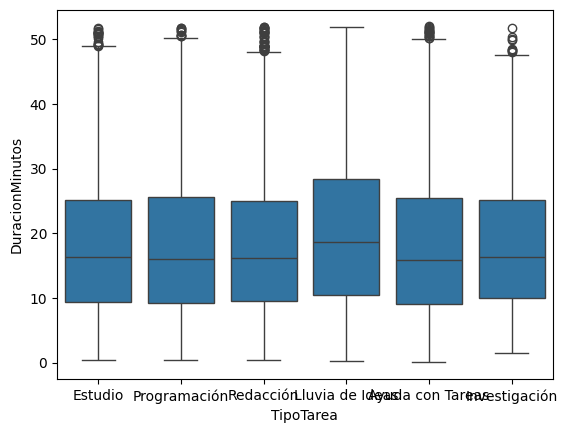

In [408]:
sns.boxplot(x="TipoTarea", y="DuracionMinutos", data=df)

Podemos ver que los tipos de tarea que toman mas tiempo en promedio son las lluvias de ideas, mientras que redacción y asistencia con Tarea son las menores, los outliers nos indicam que en Redacción hay mucha gente con conversaiones grandes, junto a estudio y asistencia con la Tarea.

<Axes: xlabel='TipoTarea', ylabel='TotalIndicaciones'>

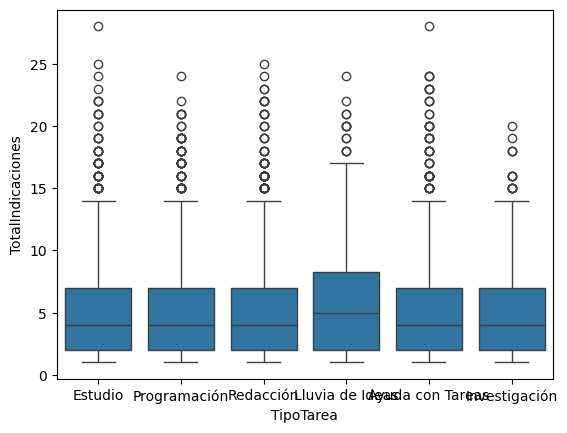

In [409]:
sns.boxplot(x="TipoTarea", y="TotalIndicaciones", data=df)

Podemos notar que lluvia de ideas tambien tiene la mayor cantidad de mensajes, con unos pocos outliers, el resto se mantiene en cierto promedio; en cuanto a los outliers, estos se presentan mayormente en Estudio y Tareas, esta correlacionado con el grafico anterior.

<Axes: xlabel='TipoTarea', ylabel='NivelAsistenciaIA'>

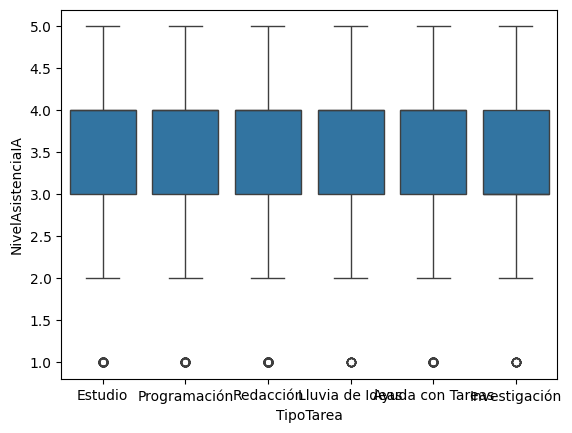

In [410]:
sns.boxplot(x="TipoTarea", y="NivelAsistenciaIA", data=df)

Identicos.

<Axes: xlabel='TipoTarea', ylabel='CalificacionSatisfaccion'>

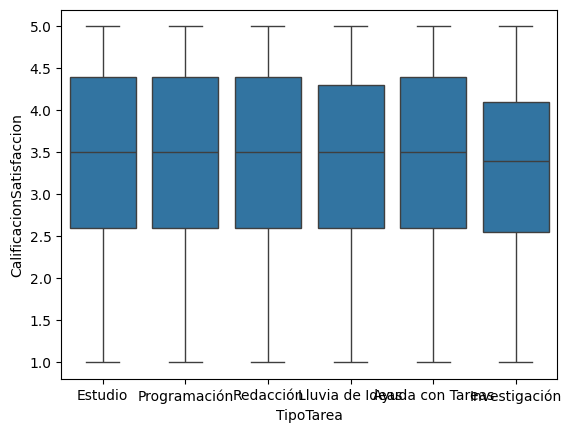

In [411]:
sns.boxplot(x="TipoTarea", y="CalificacionSatisfaccion", data=df)

Curiosamente, solo hay dos que tienen una satisfacción mas baja que las demas, investigación y lluvia de ideas, parece ser que la gente pasa mas tiempo y manda mas mensajes para no obtener el resultado que deseaban; investigación con IA no es muy confiable, y es natural que tenga la menor calificación.

<Axes: xlabel='ResultadoFinal', ylabel='DuracionMinutos'>

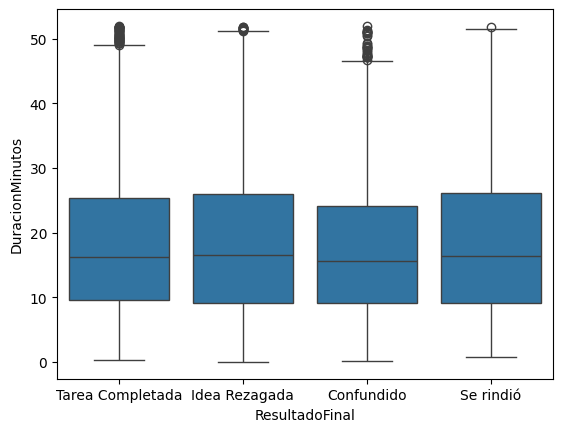

In [412]:
sns.boxplot(x="ResultadoFinal", y="DuracionMinutos", data=df)

Parece ser que, mientras mas corta sea la conversación, o mas larga, hay mas probabilidades de terminar confundido, pues podemos ver que "Confundido" tiene el promedio mas bajo, con mas outliers de todos; junto a "Se rindió", podemos ver que mientras mas larga sea una cnversación con una IA, exiten mas probabilidades de fallar.

<Axes: xlabel='ResultadoFinal', ylabel='TotalIndicaciones'>

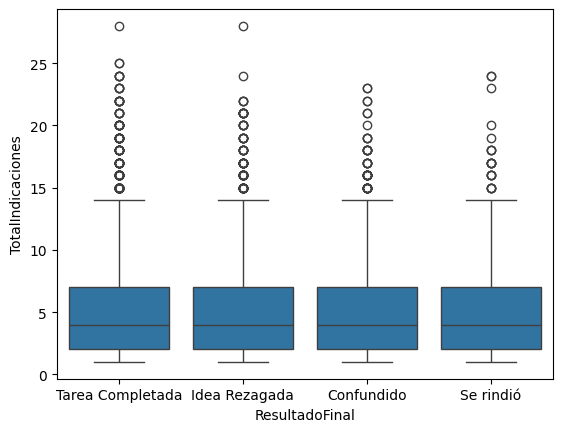

In [413]:
sns.boxplot(x="ResultadoFinal", y="TotalIndicaciones", data=df)

Mientras que todos son iguales, podemos ver que aquellos que lograron su tarea con exito suelen tener mas mensajes en los outliers que los demas.

<Axes: xlabel='ResultadoFinal', ylabel='NivelAsistenciaIA'>

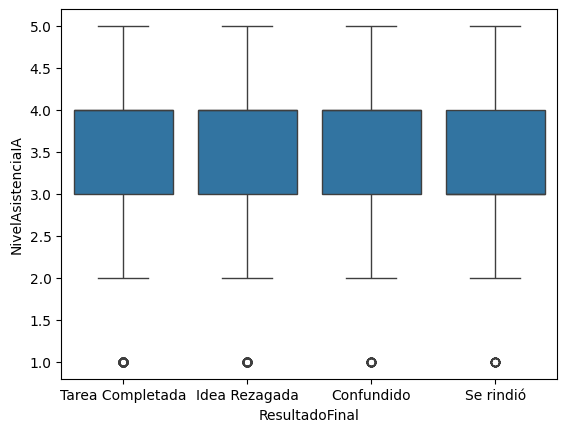

In [414]:
sns.boxplot(x="ResultadoFinal", y="NivelAsistenciaIA", data=df)

Identicas.

<Axes: xlabel='ResultadoFinal', ylabel='CalificacionSatisfaccion'>

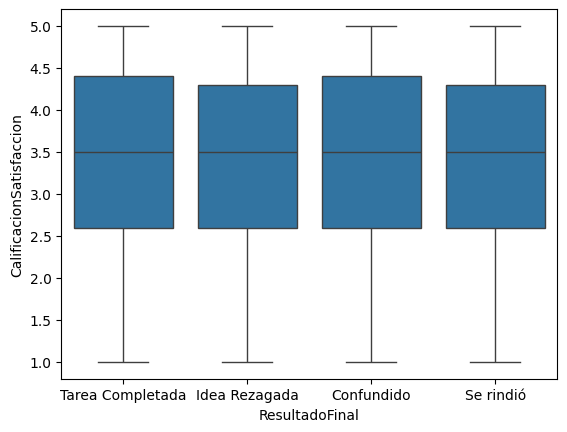

In [415]:
sns.boxplot(x="ResultadoFinal", y="CalificacionSatisfaccion", data=df)

Es evidente que los que no tengan exito en sus objetivos no daran una calificación de satisfacción positiva, como es el caso de los que se rindieron y los que rezagaron sus ideas, curiosamente, parece que los que se confundieron, calificaron positivamente.

<Axes: xlabel='UsadoNuevamente', ylabel='DuracionMinutos'>

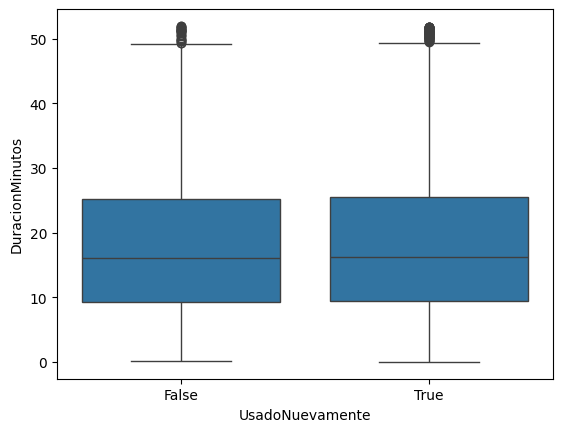

In [416]:
sns.boxplot(x="UsadoNuevamente", y="DuracionMinutos", data=df)

Minima diferencia, los que volvieron a usar la IA la usaron ligeramente mas.

<Axes: xlabel='UsadoNuevamente', ylabel='TotalIndicaciones'>

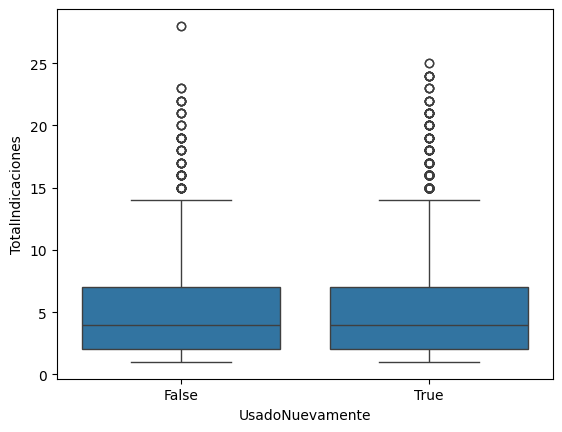

In [417]:
sns.boxplot(x="UsadoNuevamente", y="TotalIndicaciones", data=df)

Identicas, parece ser que los que la usaron de nuevo tuvieron mas mensajes.

<Axes: xlabel='UsadoNuevamente', ylabel='NivelAsistenciaIA'>

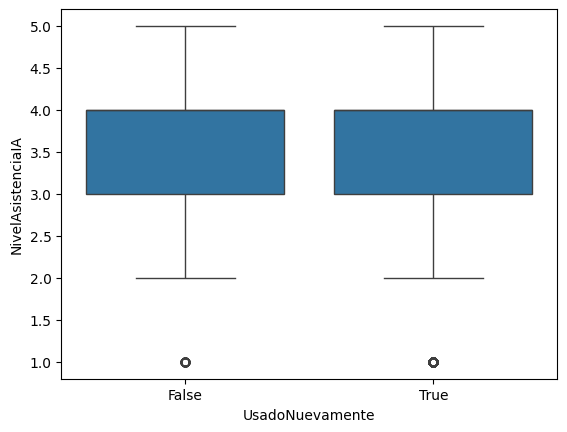

In [418]:
sns.boxplot(x="UsadoNuevamente", y="NivelAsistenciaIA", data=df)

Identicos.

<Axes: xlabel='UsadoNuevamente', ylabel='CalificacionSatisfaccion'>

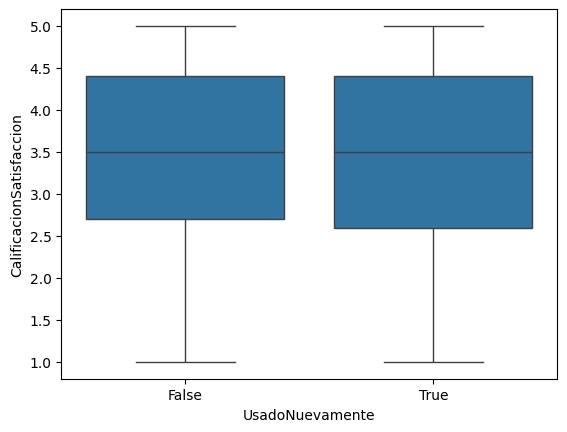

In [419]:
sns.boxplot(x="UsadoNuevamente", y="CalificacionSatisfaccion", data=df)

Claramente, los que no la volvieron a usar tuvieron menos satisfacción.

In [420]:
print(numericas)

['DuracionMinutos', 'TotalIndicaciones', 'NivelAsistenciaIA', 'CalificacionSatisfaccion']


In [421]:
print(categoricas)

['ID_Sesion', 'NivelEstudiante', 'Disciplina', 'TipoTarea', 'ResultadoFinal', 'UsadoNuevamente']


### **Observaciones y hallazgos:**

Sin variable objetivo, se usara clusterización; esta es tambien una base de datos muy logica, se puede ver las variables mas influeyentes son correlaciones logicas: DuracionMinutos & TotalIndicaciones junto a CalificacionSatisfaccion & NivelAsistenciaIA son influyentes porque, si una sube, la otra le sigue, y es logico.

* **Patrones o relaciones interesantes:**  
Mas que nada, la gran orientación logica que esta base de datos tiene, todas las correlaciones hacen sentido y, al mismo tiempo, muy pocas tienen correlación entre si, parecen casi, independientes unas de las otras.

* **Outliers Relevantes:**  
Podemos notar en NivelAsistenciaIA, todos los outliers relacionados a esta incluyen a la calificación de 1 como outlier, lo que indica lo poco comun que es esta. 
Ademas de eso, podemos notar muchos outliers a lo largo de la mayoria de los procedimientos, la mayoria de estos siendo bastante controlados, lo que indica que aquellos grupos pequeños de personas usando la IA de manera mas compleja es una constante en esta base de datos. No se eliminaron ya que, como se comento, no son pocos, y se puede usar otros metodos, como K means para entenderlos mejor.

* **Variables desbalanceadas:**  
La mayoria de las categorias tienen alrededor de al menos una categoria que tiene mas que las demas por al menos un 10%, los casos con mas desbalance son:
UsadoNuevamente:
True: 70%
False: 30%
ResultadoFinal:
Tarea Completada: 48%
Idea Rezagada: 28%
Confundido: 16%
Se rindió: 8%
NivelEstudiante:
Universitario: 59%
Preparatoria: 21%
Graduado: 20%

* **Correlaciones fuertes o inesperadas:**  
Podemos ver tres correlaciones, estas siendo:  

DuracionMinutos & TotalIndicaciones, CalificacionSatisfaccion & NivelAsistenciaIA siendo las mas fuertes, junto a una ligera correlación entre ResultadoFinal & UsadoNuevamente, estas siendo relaciones bastante logicas.

* **Problemas de datos:**  
No hay filas duplicadas, ni valores faltantes, solo una cantidad alarmante de outliers que son importantes para el analisis.¿, pero que tambien pueden alterar el analisis.

Finalmente, llegamos a 3 conclusiones:
* Los outliers son varios, y pueden tanto ser utiles mas adelantes como alterar el resultado.  
* Esta base de datos es logica, por lo que los resultados seran posiblemente lineales.  
* Hay dos correlaciones que pueden provocar multicolinealidad, DuracionMinutos & TotalIndicaciones, y CalificacionSatisfaccion & NivelAsistenciaIA, asi que, se eliminaran DuracionMinutos y NivelAsistenciaIA.

# **Modelo de Machine Learning:**

## **Descripción del Modelo:**  


Mi modelo es K-Nearest Neighbors (KNN), de clustering, pues no hay variable objetivo; es un modelo de aprendizaje no supervisado que en lugar de predecir agrupa y clasifica en base a la similitud de los datos, asi creando grupo(s) que se pueden interpretar como patrones de comportamiento o factores importantes en la base de datos, lo que ayuda a explicar de una mejor forma el contenido de la base de datos. Los problemas que resuelve se podrian relacionar a los que ya mencione, encontrar patrones donde otros modelos de ML fallan, y es un metodo que se usa cuando el R2 no es lo suficientemente alto como para justificar el uso de modelos de Machine Learning de naturaleza predictiva; en conclusión, encontrar patrones en datos que aparentemente no dicen nada.

## **Justificación:**

* Al final, preferi decantarme por no elegir una variable objetivo, y en su lugar, usar K-Means, lo que significa que estare usando los tres pares de variables con fuerte cohesión para ver que podemos encontrar.  

* El dataset tiene un tañaño de 8622 filas y 11 columnas.  

* Se busca encontrar patrones e insights que nos puedan mostrar que mas hay en nuestros conjuntos de datos, tomando en cuenta los outliers.

## **Implementación y entrenamiento:**

In [6]:
df['ResultadoFinal_num'] = df['ResultadoFinal'].map({
    'Tarea Completada': 1, 
    'Idea Rezagada': 2,
    'Confundido': 3, 
    'Se rindió': 4})

df['UsadoNuevamente_num'] = df['UsadoNuevamente'].map({
    True: 1, 
    False: 2})

Se preparan estas variables al pasarlas a numericos para poder ser usadas en el codigo siguiente.

In [7]:
from sklearn.preprocessing import StandardScaler


X_features = df[['CalificacionSatisfaccion', 'NivelAsistenciaIA', "DuracionMinutos","TotalIndicaciones", "ResultadoFinal_num", "UsadoNuevamente_num"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

Aqui usamos todas las variables importantes (aquellas con alta correlación) para alimentar a nuestro modelo}.

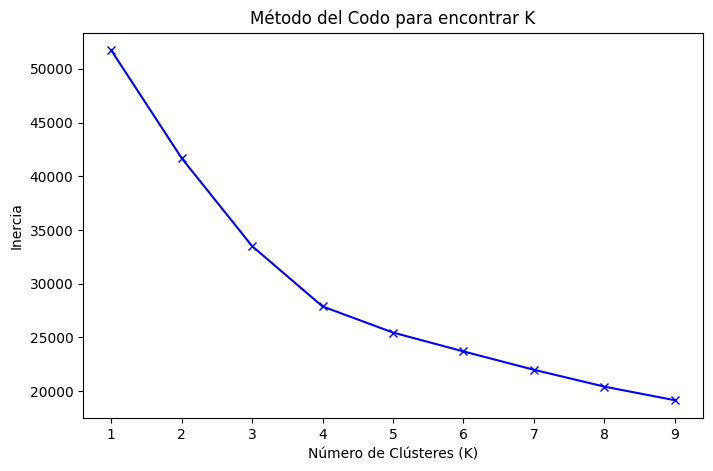

In [10]:
inertia = []
K_range = range(1, 10) # Prueba de 1 a 9 clústeres

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar K')
plt.show()


Este metodo del codo nos ayuda a determinar K, K son la cantidad de grupos que es mas natural que usemos en nuestro K-means de acuedo a nuestros datos con la que alimentamos al modelo previamente. Es cuando decrece, por ende, K es igual a 3!

In [11]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

Entrenamiento.

## **Resultados y Evaluación:**

In [12]:

df['ResultadoFinal_num'] = df['ResultadoFinal'].map({
    'Tarea Completada': 1, 
    'Idea Rezagada': 2,
    'Confundido': 3, 
    'Se rindió': 4
})

df['UsadoNuevamente_num'] = df['UsadoNuevamente'].map({
    True: 1, 
    False: 2
})

feature_list = [
    'CalificacionSatisfaccion', 
    'NivelAsistenciaIA', 
    "DuracionMinutos",
    "TotalIndicaciones", 
    "ResultadoFinal_num",
    "UsadoNuevamente_num"
]

X_features = df[feature_list]

X_features_filled = X_features.fillna(X_features.median())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features_filled)

kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X_scaled)

df['cluster'] = kmeans_model.labels_

perfiles = df.groupby('cluster')[feature_list].mean()

print("Perfiles Promedio de cada Clúster:")
print(perfiles.round(2))

Perfiles Promedio de cada Clúster:
         CalificacionSatisfaccion  NivelAsistenciaIA  DuracionMinutos  \
cluster                                                                 
0                            2.42               2.65            15.45   
1                            4.23               4.20            14.67   
2                            3.50               3.49            41.25   

         TotalIndicaciones  ResultadoFinal_num  UsadoNuevamente_num  
cluster                                                              
0                     4.08                1.84                 1.29  
1                     3.86                1.81                 1.31  
2                    12.82                1.86                 1.29  


Se podria decir que estos numeros son la grafica K-means pero en numeros solamente, no visualmente.

In [13]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, kmeans_model.labels_)
print(f"Coeficiente de Silueta: {score:.3f}")

Coeficiente de Silueta: 0.211


Determina que tan separados estan los clusteres de los otros, un 1 siendo que estan bien definidos, un -1 lo contrario y un 0 que se estan sobreponiendo, que es nuestro caso, lo que indica que hay varios ususarios que no se pueden definir por completo en los patrones que mi modelo definio y por ende se encuentran en un limbo de varios clusteres a la vez.

## **Visualización de Resultados:**

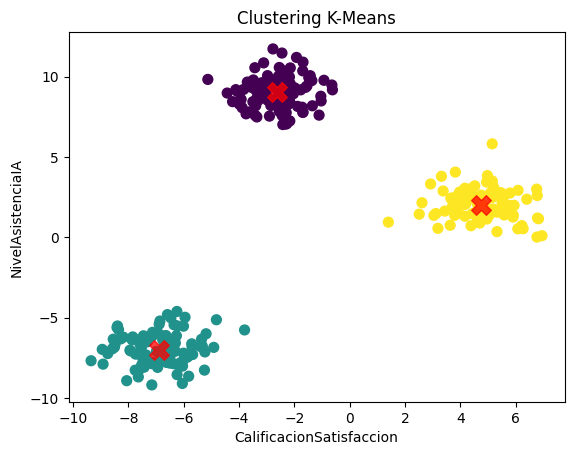

In [14]:
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Entrenar modelo K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Clustering K-Means")
plt.xlabel("CalificacionSatisfaccion")
plt.ylabel("NivelAsistenciaIA")
plt.show()

## **Conclusión del Modelo:**

Como resultado de todo esto, podemos determinar que lo mejor es obtener 3 grupos, y que mientras, que algunos se sobrelapan, podemos encontrar varios patrones muy interesantes. Como:  

Aquellos como el grupo amarillo, que muestran alta satisfacción y asistencia significa que recibieron mucha asistencia de parte de la IA, y por ende mucha satisfacción de parte del usuario, lo que da el perfil de un usuario que decae o depende mucho de la IA.  

Aquellos como el grupo morado, mientras que tienen alta satisfacción, no dependen del rendimiento de la IA, y son independientes, obteniendo resultados positivos.  

El grupo cyan son aquellos que no recibieron ninguna ayuda de la IA y no tuvieron satisfacción alguna, puede significar dos cosas, o la IA, fracaso por completo, o el usuario realmente no le dio la oportunidad de hacerlo y se fue mas rapido de lo que vino.

Perfiles Promedio de cada Clúster:  

         CalificacionSatisfaccion  NivelAsistenciaIA  DuracionMinutos  \
                                                                 
0                            2.42               2.65            15.45   
1                            4.23               4.20            14.67   
2                            3.50               3.49            41.25   

         TotalIndicaciones  ResultadoFinal_num  UsadoNuevamente_num  
                                                              
0                     4.08                1.84                 1.29  
1                     3.86                1.81                 1.31  
2                    12.82                1.86                 1.29

Lo que pidemos encontrar de aqui son, otra vez, tres grupos que son generales en todos los clusteres:  

Podmemos encontrar que hay un grupo con alta satisfacción, resultado final positivo y si regresan, usuarios leales que tienen sesiones satisfactorias y exitosas, su tiempo es corto con pocos mensajes, lo que indica usuarios rapidos, que no pierden el tiempo y logran su objetivo de manera satisfactoria.

Con una satisfacción media, un resultado final positivo y que regresan, junto a un tiempo de uso muy kargo y muchos mensajes, indican usuarios que tienen sesiones largas, y que mientras vuelven, no tienen mucha satisfacción, lo que tal vez indica a sesiones que no terminan muy bien.  

Y por ultimo, usuarios que tienen baja satisfacción, pero un resultado final positivo y si regresan, una contradicción, usuarios que no estan satisfechos pero, por alguna razon vuelven y tienen resultados positivos.

Como conclusión, yo veo en este modelo la capacidad de poder analizar cuanta gente se esta comportando como el grupo cyan, y evitar que dejen de usar la IA, y asi poder minimizar perdidas, aumentar enganche y mantener el flujo de datos estable!

# **Dashboard en Tkinter:**

## **Explicación del Dashboard**  

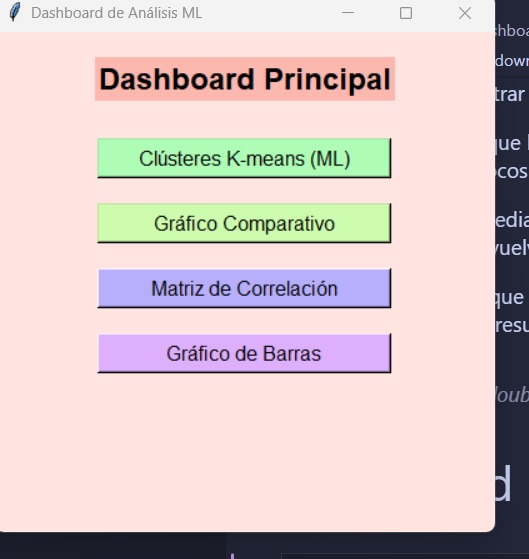  

El menu de mi dashboard, en el que hay cuatro botones y una etiqueta. Se usan muchas funciones if para ajustar el color, la imagen y el texto del titulo de la pagina como el de la grafica, todo dependiendo del boton seleccionado, junto a cierre automatico de la ventana origen cada vez que se pulsa un boton.

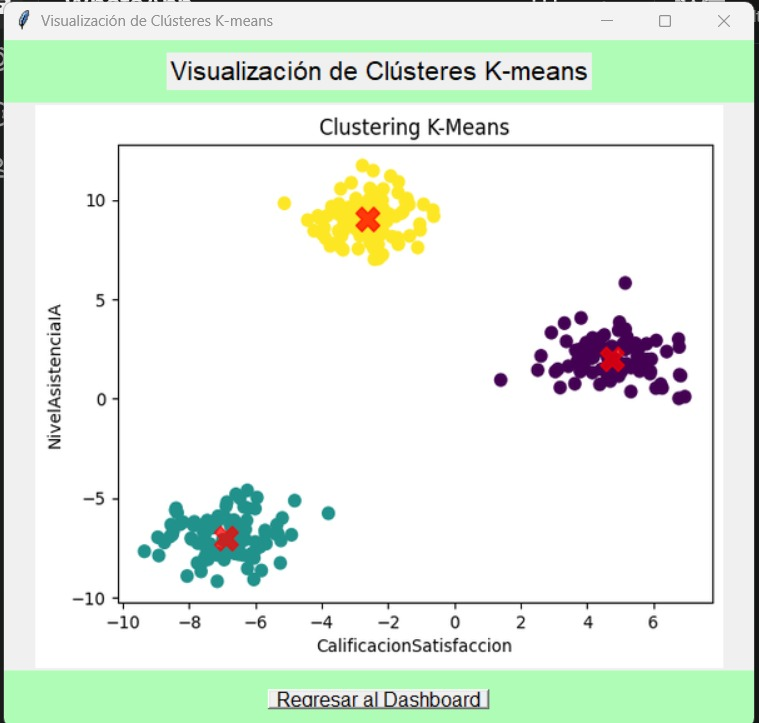  


"*En esta grafica podemos apreciar tres grupos diferentes, algo que agregar, es que estos grupos son una constante a lo largo de todo el analisis de datos. Empezamos con el grupo que se encuentra mas arriba de todos los demas, este grupo es de denotar, pues tiene la maxima cantidad de satisfacción, pero tambien de asistencia de la IA, lo que podria implicar dependencia a la hora de llevar acabo diferentes tareas. Los morados son aquellos con satisfacción maxima y baja asitencia de la IA, lo que apunta a usuarios mas independientes que solo buscan soluciones para problemas concretos y las consiguen. La ultima, cyan, son aquellos sin satisfacción y baja asistencia de la IA, puede que indique usuarios que nunca empezaron una sesión, no estan satisfechos con las respuestas o son altamente exigentes.*"  

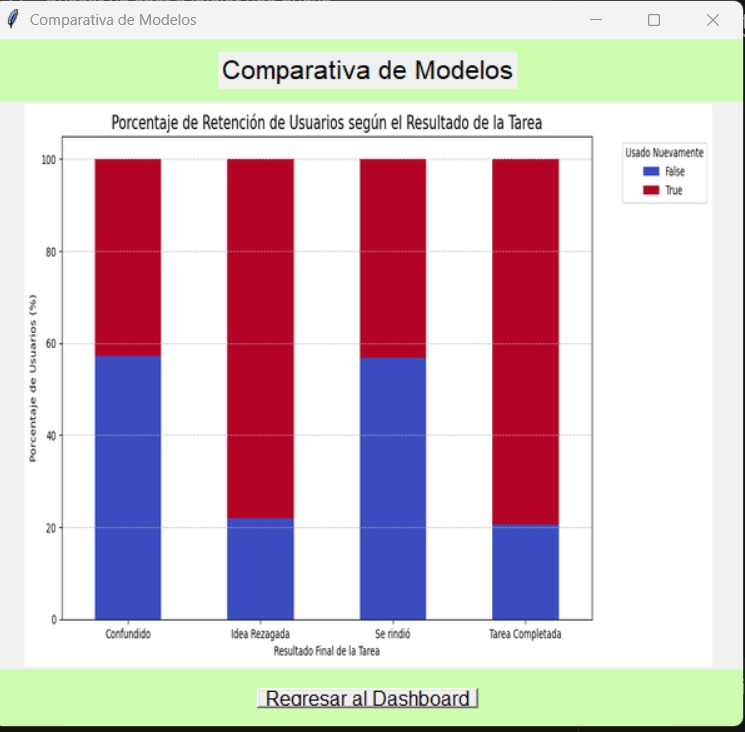   

"*En esta grafica podemos notar un sentido muy logico, pues aquellos que vuelven a usar la IA (parte roja) aumenta si la tarea tiene exito, caso contrario si no se tiene exito, y por ende aquellos que no vuelven a usar la IA (parte azul) aumenta.*"  

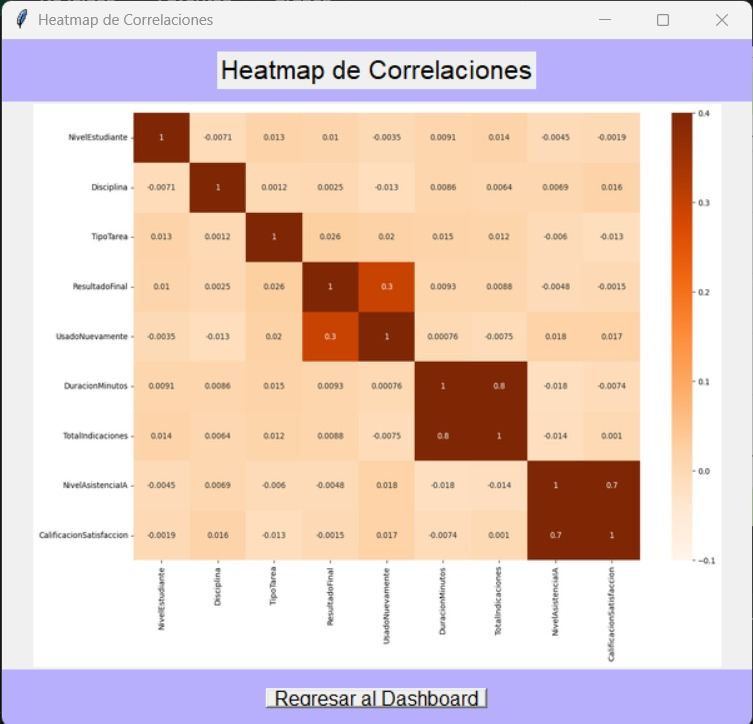   

"*En este caso se puede ver mi heatmap de toda mi base de datos, en este caso podemos notar las tres correlaiones que definen la entereza de mi base de datos, que son DuracionMinutos & TotalIndicaciones, CalificacionSatisfaccion & NivelAsistenciaIA siendo las mas fuertes, junto a una ligera correlación entre ResultadoFinal & UsadoNuevamente.*"  

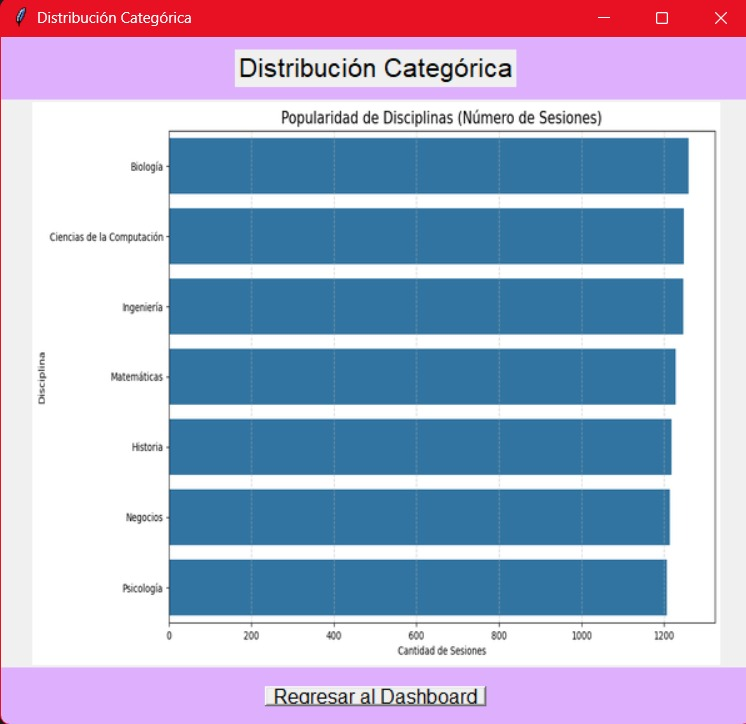   

"*En esta grafica se puede bver una grafica de barras clasica de todas las disciplinas de mi base de datos, denotando facilmente que ingenierias, ciencias de la computación y sobre todo, Biologia, usan mas la IA, lo comtrario con Psicologia, Negocios y Historia.*"  

## **Uso y Beneficios:**  

El dashboard es algo integral de cada proyecto, y muestra los resultados finales, ademas de ser la parte que el cientifico en datos mas utilizara para mostrar el resultado de su trabajo, lo que claramente ayuda al publico objetivo para tomar decisiones informadas y guiadas por la grafica; al mirar estas graficas en especifico podemos ver la estructura logica que mi base de datos sigue en el caso de mi gráfico comparativo, junto a las correlaciones que definen mi analisis y Machine Learning entero, mi Machine Learning en si (y su explicación) que muestra los patrones ocultos y, finalmente mi grafico de barras que nos ayuda a encontrar comparaciones en base a las disciplinas, mostrando que se puede hacer con muchas otras cualidades de mi base de datos.

## **Ejemplos de implementación:**  

In [15]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageTk 


def imagen(tipo_grafica):
    
    if tipo_grafica == "kmeans":
        imagen = Image.open("kmean.png")
    
    elif tipo_grafica == "comparativo":
        imagen = Image.open("comparacion.png")

    elif tipo_grafica == "correlacion":
        imagen = Image.open("heatmap.png")

    elif tipo_grafica == "barras":
        imagen = Image.open("barras.png")
    plt.tight_layout()
    return imagen

def texto(tipo_grafica):
    if tipo_grafica == "kmeans":
        return ("En esta grafica podemos apreciar tres grupos diferentes, algo que agregar, es que estos grupos son una constante a lo largo de todo el analisis de datos. Empezamos con el grupo que se encuentra mas arriba de todos los demas, este grupo es de denotar, pues tiene la maxima cantidad de satisfacción, pero tambien de asistencia de la IA, lo que podria implicar dependencia a la hora de llevar acabo diferentes tareas. Los morados son aquellos con satisfacción maxima y baja asitencia de la IA, lo que apunta a usuarios mas independientes que solo buscan soluciones para problemas concretos y las consiguen. La ultima, cyan, son aquellos sin satisfacción y baja asistencia de la IA, puede que indique usuarios que nunca empezaron una sesión, no estan satisfechos con las respuestas o son altamente exigentes.")
    if tipo_grafica == "comparativo":
        return ("En esta grafica podemos notar un sentido muy logico, pues aquellos que vuelven a usar la IA (parte roja) aumenta si la tarea tiene exito, caso contrario si no se tiene exito, y por ende aquellos que no vuelven a usar la IA (parte azul) aumenta.")
    if tipo_grafica == "correlacion":
        return ("En este caso se puede ver mi heatmap de toda mi base de datos, en este caso podemos notar las tres correlaiones que definen la entereza de mi base de datos, que son DuracionMinutos & TotalIndicaciones, CalificacionSatisfaccion & NivelAsistenciaIA siendo las mas fuertes, junto a una ligera correlación entre ResultadoFinal & UsadoNuevamente.")
    if tipo_grafica == "barras":
        return ("En esta grafica se puede bver una grafica de barras clasica de todas las disciplinas de mi base de datos, denotando facilmente que ingenierias, ciencias de la computación y sobre todo, Biologia, usan mas la IA, lo comtrario con Psicologia, Negocios y Historia.")
    else:
        return("Error.")
def crear_ventana_principal():
    global root 
    root = tk.Tk()
    root.title("Dashboard de Análisis ML")
    root.geometry("400x400")
    root.config(bg="#ffe4e1") 

    tk.Label(root, text="Dashboard Principal", font=("Arial", 18, "bold"), bg="#fcb7af").pack(pady=20)

    tk.Button(root, text="Clústeres K-means (ML)", 
              font=("Arial", 12), 
              width=25,
              bg="#affcb7",
              command=lambda: mostrar_grafica(
                  "Visualización de Clústeres K-means", 
                  "kmeans"
              )).pack(pady=10)

    tk.Button(root, text="Gráfico Comparativo", 
              font=("Arial", 12),
              width=25,
              bg="#cdfcaf",
              command=lambda: mostrar_grafica(
                  "Comparativa de Modelos", 
                  "comparativo"
              )).pack(pady=10)

    tk.Button(root, text="Matriz de Correlación", 
              font=("Arial", 12),
              width=25,
              bg="#b7affc",
              command=lambda: mostrar_grafica(
                  "Heatmap de Correlaciones", 
                  "correlacion"
              )).pack(pady=10)

    tk.Button(root, text="Gráfico de Barras", 
              font=("Arial", 12),
              width=25,
              bg="#ddaffc",
              command=lambda: mostrar_grafica(
                  "Distribución Categórica", 
                  "barras"
              )).pack(pady=10)

    root.mainloop()

def mostrar_grafica(titulo_ventana, tipo_grafica):
    root.destroy()

    grafica_ventana = tk.Tk()
    if tipo_grafica == "kmeans":
        grafica_ventana.config(bg="#affcb7")
    
    elif tipo_grafica == "comparativo":
        grafica_ventana.config(bg="#cdfcaf")

    elif tipo_grafica == "correlacion":
        grafica_ventana.config(bg="#b7affc")

    elif tipo_grafica == "barras":
        grafica_ventana.config(bg="#ddaffc")

    grafica_ventana.title(titulo_ventana)
    grafica_ventana.geometry("750x750")

    tk.Label(grafica_ventana, text=titulo_ventana, font=("Arial", 16)).pack(pady=10)

    try:
        imagen_pil = imagen(tipo_grafica)
        
        imagen_pil = imagen_pil.resize((550, 450), Image.LANCZOS)
        
        imagen_tk = ImageTk.PhotoImage(imagen_pil)

        label_imagen = tk.Label(grafica_ventana, image=imagen_tk)
        label_imagen.image = imagen_tk 
        label_imagen.pack(side=tk.TOP, fill=tk.BOTH, expand=1)


    except Exception as e:
        print(f"Error al cargar la gráfica: {e}")
        messagebox.showerror("Error de Gráfica", "Algo malo acaba de ocurrir.")
        regresar_a_principal(grafica_ventana)
        return
    
    exp = texto(tipo_grafica)

    tk.Label(grafica_ventana, 
             text=exp, 
             font=("Arial", 10), 
             bg="#8e713a", 
             wraplength=550, 
             justify="center").pack(pady=15)
    
    tk.Button(grafica_ventana, text="Regresar al Dashboard", 
              font=("Arial", 12),
              command=lambda: regresar_a_principal(grafica_ventana)).pack(pady=15)

    grafica_ventana.mainloop()

def regresar_a_principal(ventana_actual):
    plt.close('all') 
    ventana_actual.destroy()
    crear_ventana_principal()

if __name__ == "__main__":
    crear_ventana_principal()

# **Conclusión:**  

En general, este analisis de datos fue un exito para mi investigación inicial, me aporta los datos necesarios para probar mis hipotesis y, em general, logre la mayoria de mis objetivos.  
Es de reconocerse que la mayoria de mis errores se debieron a mi torpeza, olvidar algunos pasos o ser incapaz de explicar larga y tendido en texto, pero fuera de ello, podria mejorar en todas las areas, y me siento mas seguro para poder realizar otra vez el mismo proceso y obtener resultados mas precisos y satisfactorios de manera mas rapida y eficiente.

# **Referencias:**  

Base de datos de Kaggle usada:  

https://www.kaggle.com/datasets/2e5fef684fac2b1f788280a598207f3fe3f760e7c639485476376a8e257e5485  

Libro usado para referencia y guia sobre el tema:  

"*Building Chatbots with Python Using Natural Language Processing and Machine Learning*" por Sumit Raj. 